# Project Regression : nba2k20

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #for feature scaling

In [3]:
raw_data = pd.read_csv('nba2k20-full.csv')

In [4]:
raw_data.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.0+ KB


In [6]:
raw_data.describe()

,rating,draft_year
count,429.000000,429.000000
mean,76.372960,2014.093240
std,5.657748,3.937678
min,67.000000,2001.000000
25%,72.000000,2012.000000
50%,75.000000,2015.000000
75%,79.000000,2017.000000
max,97.000000,2019.000000


In [7]:
raw_data.isna().sum()

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        66
dtype: int64

# Data Cleansing

In [8]:
#eliminate the index feature that should not be included in the model
#re-arrange the column
#Change the data type to make it usable
#fill missing value with unknown, 0, 
raw_data = raw_data[['rating','team','position','b_day','height','weight','country','draft_year','draft_round','draft_peak','college','salary']]
raw_data

,rating,team,position,b_day,height,weight,country,draft_year,draft_round,draft_peak,college,salary
0,97,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,USA,2003,1,1,NaN,$37436858
1,97,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,USA,2011,1,15,San Diego State,$32742000
2,96,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,Greece,2013,1,15,NaN,$25842697
3,96,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,USA,2007,1,2,Texas,$37199000
4,96,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,USA,2009,1,3,Arizona State,$38199000
...,...,...,...,...,...,...,...,...,...,...,...,...
424,68,Atlanta Hawks,G,10/02/95,6-0 / 1.83,180 lbs. / 81.6 kg.,USA,2018,Undrafted,Undrafted,Florida Gulf Coast,$522738
425,68,Houston Rockets,G,03/08/94,6-3 / 1.91,200 lbs. / 90.7 kg.,USA,2015,2,60,Florida,$79568
426,68,Los Angeles Lakers,F,11/20/97,6-10 / 2.08,200 lbs. / 90.7 kg.,Greece,2018,Undrafted,Undrafted,Dayton,$79568
427,68,Phoenix Suns,G,06/13/00,6-3 / 1.91,190 lbs. / 86.2 kg.,USA,2019,Undrafted,Undrafted,NaN,$898310


In [9]:
raw_data['position'].unique()

array(['F', 'F-G', 'G', 'F-C', 'C', 'G-F', 'C-F'], dtype=object)

In [10]:
#Cleaning each Features
cleaned_data = raw_data.copy()

cleaned_data['team']     = cleaned_data['team'].fillna('no team')
cleaned_data['position'] = cleaned_data['position'].apply(lambda x: 'F-C' if x=='C-F' else x)
cleaned_data['position'] = cleaned_data['position'].apply(lambda x: 'F-G' if x=='G-F' else x)
cleaned_data['b_day']    = pd.to_datetime(cleaned_data['b_day']).dt.year
cleaned_data['height']   = cleaned_data['height'].str.split('/').str[1].astype('float')
cleaned_data['weight']   = cleaned_data['weight'].str.split('/').str[1].str[0:-3].astype('float')
cleaned_data['draft_year']= pd.to_numeric(cleaned_data['draft_year'])
cleaned_data['draft_round']= cleaned_data['draft_round'].apply(lambda x: 0 if x=='Undrafted' else x).astype('int64')
cleaned_data['draft_peak']= cleaned_data['draft_peak'].apply(lambda x: 0 if x=='Undrafted' else x).astype('int64')
cleaned_data['college'] = cleaned_data['college'].fillna('Unknown')
cleaned_data['salary'] = pd.to_numeric(cleaned_data['salary'].str.split('$').str[1])

In [11]:
cleaned_data.head()

,rating,team,position,b_day,height,weight,country,draft_year,draft_round,draft_peak,college,salary
0,97,Los Angeles Lakers,F,1984,2.06,113.4,USA,2003,1,1,Unknown,37436858
1,97,Los Angeles Clippers,F,1991,2.01,102.1,USA,2011,1,15,San Diego State,32742000
2,96,Milwaukee Bucks,F-G,1994,2.11,109.8,Greece,2013,1,15,Unknown,25842697
3,96,Brooklyn Nets,F,1988,2.08,104.3,USA,2007,1,2,Texas,37199000
4,96,Houston Rockets,G,1989,1.96,99.8,USA,2009,1,3,Arizona State,38199000


In [12]:
#Cleaning data2 (Data manipulation)
#Changing the column name
from datetime import date
cleaned_data['age'] =  date.today().year - cleaned_data['b_day']
cleaned_data['draft_year_duration'] = date.today().year - cleaned_data['draft_year']
cleaned_data['BMI'] =  cleaned_data['weight']/cleaned_data['height']**2

In [13]:
cleaned_data.drop(['b_day','draft_year','weight','height'],axis = 1,inplace = True)

,rating,draft_round,draft_peak,salary,age,draft_year_duration,BMI
rating,1.000000,0.019624,-0.232989,0.775239,0.271752,0.391595,0.065947
draft_round,0.019624,1.000000,0.849904,0.014173,-0.080826,-0.053368,0.048864
draft_peak,-0.232989,0.849904,1.000000,-0.177017,-0.061703,-0.119386,0.018645
salary,0.775239,0.014173,-0.177017,1.000000,0.428421,0.512727,0.025133
age,0.271752,-0.080826,-0.061703,0.428421,1.000000,0.918485,0.081852
draft_year_duration,0.391595,-0.053368,-0.119386,0.512727,0.918485,1.000000,0.063944
BMI,0.065947,0.048864,0.018645,0.025133,0.081852,0.063944,1.000000


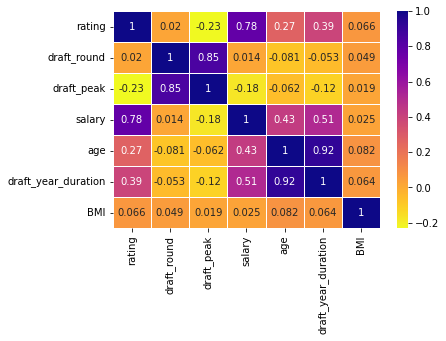

In [14]:
sns.heatmap(cleaned_data.corr(),annot=True, cmap = 'plasma_r',linewidths = 1)
cleaned_data.corr()

In [15]:
cleaned_data.corr()

,rating,draft_round,draft_peak,salary,age,draft_year_duration,BMI
rating,1.000000,0.019624,-0.232989,0.775239,0.271752,0.391595,0.065947
draft_round,0.019624,1.000000,0.849904,0.014173,-0.080826,-0.053368,0.048864
draft_peak,-0.232989,0.849904,1.000000,-0.177017,-0.061703,-0.119386,0.018645
salary,0.775239,0.014173,-0.177017,1.000000,0.428421,0.512727,0.025133
age,0.271752,-0.080826,-0.061703,0.428421,1.000000,0.918485,0.081852
draft_year_duration,0.391595,-0.053368,-0.119386,0.512727,0.918485,1.000000,0.063944
BMI,0.065947,0.048864,0.018645,0.025133,0.081852,0.063944,1.000000


### From the corr heatmap , the features that should be used are (rating , age, draft_year_duration) 

In [16]:
#Dealing with categorical data : one hot encoder with pd.dummies
for column in ['team','position','country','draft_round','college']:
    if column == 'college':
        encoded_columns = pd.get_dummies(cleaned_data[column],prefix = 'college')
        cleaned_data = cleaned_data.join(encoded_columns).drop(column, axis = 1)
    else:
        encoded_columns = pd.get_dummies(cleaned_data[column])
        cleaned_data = cleaned_data.join(encoded_columns).drop(column, axis = 1)

In [17]:
cleaned_data.head()

,rating,draft_peak,salary,age,draft_year_duration,BMI,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,...,college_Washington,college_Washington State,college_Weber State,college_West Virginia,college_Western Kentucky,college_Wichita State,college_Wisconsin,college_Wyoming,college_Xavier,college_Yale
0,97,1,37436858,38,19,26.722594,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,97,15,32742000,31,11,25.271652,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96,15,25842697,28,9,24.662519,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,96,2,37199000,34,15,24.107803,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,96,3,38199000,33,13,25.978759,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Standardization numberical columns
#Don't forget to turn it back
for column in ['rating','draft_peak','age','draft_year_duration','BMI']:
    cleaned_data[column] = (cleaned_data[column]-cleaned_data[column].mean())/cleaned_data[column].std()

In [19]:
cleaned_data.head()

,rating,draft_peak,salary,age,draft_year_duration,BMI,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,...,college_Washington,college_Washington State,college_Weber State,college_West Virginia,college_Western Kentucky,college_Wichita State,college_Wisconsin,college_Wyoming,college_Xavier,college_Yale
0,3.645804,-1.071996,37436858,2.229533,2.817204,1.316377,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.645804,-0.199819,32742000,0.528495,0.785549,0.502060,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.469055,-0.199819,25842697,-0.200522,0.277636,0.160194,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.469055,-1.009698,37199000,1.257511,1.801377,-0.151131,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.469055,-0.947399,38199000,1.014506,1.293463,0.898912,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
cleaned_data.describe()

,rating,draft_peak,salary,age,draft_year_duration,BMI,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,...,college_Washington,college_Washington State,college_Weber State,college_West Virginia,college_Western Kentucky,college_Wichita State,college_Wisconsin,college_Wyoming,college_Xavier,college_Yale
count,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02,429.000000,429.000000,429.000000,429.000000,...,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,-8.612639e-16,-1.159394e-16,8.530080e+06,-3.478181e-16,9.937661e-17,-8.239977e-16,0.027972,0.032634,0.032634,0.023310,...,0.013986,0.004662,0.002331,0.002331,0.002331,0.004662,0.002331,0.004662,0.002331,0.002331
std,1.000000e+00,1.000000e+00,9.218059e+06,1.000000e+00,1.000000e+00,1.000000e+00,0.165085,0.177884,0.177884,0.151062,...,0.117570,0.068199,0.048280,0.048280,0.048280,0.068199,0.048280,0.068199,0.048280,0.048280
min,-1.656659e+00,-1.134294e+00,5.000000e+04,-1.658555e+00,-1.246105e+00,-2.276254e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.729154e-01,-8.851009e-01,2.000000e+06,-6.865331e-01,-7.381914e-01,-6.934183e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.426691e-01,-2.621177e-01,4.380120e+06,-2.005220e-01,-2.302778e-01,-9.452494e-02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.643261e-01,7.346556e-01,1.220000e+07,7.715001e-01,5.315926e-01,6.261319e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.645804e+00,2.603605e+00,4.023176e+07,3.201555e+00,3.325117e+00,4.757409e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Creation

In [21]:
X = cleaned_data.drop(['salary'],axis = 1)
Y = cleaned_data.salary


## Feature check

In [22]:
import statsmodels.api as sm

In [23]:
X = sm.add_constant(X)
est = sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     5.188
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           6.60e-32
Time:                        00:46:09   Log-Likelihood:                -7138.4
No. Observations:                 429   AIC:                         1.466e+04
Df Residuals:                     239   BIC:                         1.543e+04
Df Model:                         189                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             5.849e+06   7.47e+05      7.827      0.000    4.38e+06    7.32e+06
rating                            6.589e+06   4.72e+05     13.957      0.000    5.66e+06    7.52e+06
draft_peak                       -2.094e+05   8.23e+05     -0.254      0.799   -1.83e+06    1.41e+06
age                               1.424e+05   1.13e+06      0.126      0.900   -2.09e+06    2.37e+06
draft_year_duration               2.387e+06   1.19e+06      2.005      0.046    4.13e+04    4.73e+06
BMI                              -8.179e+04   3.79e+05     -0.216      0.829   -8.27e+05    6.64e+05
Atlanta Hawks                    -2.196e+06   2.46e+06     -0.892      0.373   -7.05e+06    2.65e+06
Boston Celtics                   -2.241e+06   1.88e+06     -1.194      0.234   -5.94e+06    1.46e+06
Brooklyn Nets                    -1.631e+06   1.82e+06     -0.897      0.371   -5.22e+06    1.95e+06
Charlotte Hornets                 4.233e+06   1.91e+06      2.212      0.028    4.63e+05       8e+06
Chicago Bulls                      1.37e+06   2.06e+06      0.665      0.507   -2.69e+06    5.43e+06
Cleveland Cavaliers               2.554e+06      2e+06      1.279      0.202   -1.38e+06    6.49e+06
Dallas Mavericks                  1.452e+05   1.74e+06      0.083      0.934   -3.28e+06    3.57e+06
Denver Nuggets                   -2.316e+05      2e+06     -0.116      0.908   -4.17e+06    3.71e+06
Detroit Pistons                   2.278e+06   1.77e+06      1.283      0.201   -1.22e+06    5.77e+06
Golden State Warriors             1.945e+06   2.21e+06      0.879      0.380   -2.41e+06     6.3e+06
Houston Rockets                  -4.569e+06   2.03e+06     -2.253      0.025   -8.56e+06   -5.75e+05
Indiana Pacers                   -6.794e+05   1.91e+06     -0.355      0.723   -4.45e+06    3.09e+06
Los Angeles Clippers             -1.919e+06   1.85e+06     -1.039      0.300   -5.56e+06    1.72e+06
Los Angeles Lakers                -3.46e+06   1.71e+06     -2.019      0.045   -6.84e+06   -8.33e+04
Memphis Grizzlies                 9.131e+05   1.77e+06      0.517      0.605   -2.56e+06    4.39e+06
Miami Heat                        4.353e+06   1.95e+06      2.234      0.026    5.14e+05    8.19e+06
Milwaukee Bucks                  -1.453e+06   1.79e+06     -0.811      0.418   -4.98e+06    2.08e+06
Minnesota Timberwolves            2.356e+06   1.81e+06      1.305      0.193    -1.2e+06    5.91e+06
New Orleans Pelicans             -9.437e+05   1.68e+06     -0.562      0.575   -4.25e+06    2.37e+06
New York Knicks                  -7.057e+05   1.67e+06     -0.423      0.673   -3.99e+06    2.58e+06
Oklahoma City Thunder             2.569e+06   1.99e+06      1.290      0.198   -1.35e+06    6.49e+06
Orlando Magic                     1.286e+06   1.84e+0

## Data split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#Split 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [26]:
X_train.shape, Y_train.shape

((343, 196), (343,))

## Linear Regression Model

In [27]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
model = linear_model.LinearRegression()

In [29]:
model.fit(X_train,Y_train)

LinearRegression()

In [30]:
Y_pred = model.predict(X_test)

In [31]:
print('Coefficients:', list(zip(cleaned_data.columns,model.coef_)))
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test, Y_pred))

Coefficients: [('rating', -5783199059359710.0), ('draft_peak', 6694424.120174467), ('salary', -143513.48325100634), ('age', -434223.5740349414), ('draft_year_duration', 2937065.5761635434), ('BMI', -136847.6485943282), ('Atlanta Hawks', 7.336850929121974e+18), ('Boston Celtics', 7.336850929119793e+18), ('Brooklyn Nets', 7.336850929120061e+18), ('Charlotte Hornets', 7.33685092912632e+18), ('Chicago Bulls', 7.336850929123365e+18), ('Cleveland Cavaliers', 7.336850929124844e+18), ('Dallas Mavericks', 7.336850929120514e+18), ('Denver Nuggets', 7.33685092912269e+18), ('Detroit Pistons', 7.336850929123092e+18), ('Golden State Warriors', 7.336850929124573e+18), ('Houston Rockets', 7.336850929117685e+18), ('Indiana Pacers', 7.336850929121978e+18), ('Los Angeles Clippers', 7.33685092911852e+18), ('Los Angeles Lakers', 7.336850929117348e+18), ('Memphis Grizzlies', 7.33685092912351e+18), ('Miami Heat', 7.336850929126184e+18), ('Milwaukee Bucks', 7.336850929121803e+18), ('Minnesota Timberwolves', 7

## Case 1
Intercept: -5.476683974721797e+19\
Mean squared error (MSE): 245907144581178712997197320604876800.00\
Coefficient of determination (R^2): -2698920438657926561792.00

### From the corr heatmap , the features that should be used are (rating , age, draft_year_duration)

In [32]:
df2 = cleaned_data[['rating','age','draft_year_duration','salary']]
df2.head()

,rating,age,draft_year_duration,salary
0,3.645804,2.229533,2.817204,37436858
1,3.645804,0.528495,0.785549,32742000
2,3.469055,-0.200522,0.277636,25842697
3,3.469055,1.257511,1.801377,37199000
4,3.469055,1.014506,1.293463,38199000


In [33]:
X2 = df2.drop('salary',axis = 1)
X2

,rating,age,draft_year_duration
0,3.645804,2.229533,2.817204
1,3.645804,0.528495,0.785549
2,3.469055,-0.200522,0.277636
3,3.469055,1.257511,1.801377
4,3.469055,1.014506,1.293463
...,...,...,...
424,-1.479911,-0.443528,-0.992148
425,-1.479911,-0.200522,-0.230278
426,-1.479911,-0.929539,-0.992148
427,-1.479911,-1.658555,-1.246105


In [34]:
Y2 = df2.salary
Y2

0      37436858
1      32742000
2      25842697
3      37199000
4      38199000
         ...   
424      522738
425       79568
426       79568
427      898310
428     1416852
Name: salary, Length: 429, dtype: int64

In [35]:
X2_ols = sm.add_constant(X2)
est2 = sm.OLS(Y2,X2_ols).fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     268.6
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           1.01e-97
Time:                        00:46:29   Log-Likelihood:                -7259.9
No. Observations:                 429   AIC:                         1.453e+04
Df Residuals:                     425   BIC:                         1.454e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 8.53e+06   2.62e+05     32.500      0.000    8.01e+06    9.05e+06
rating               6.366e+06   2.94e+05     21.631      0.000    5.79e+06    6.94e+06
age                  1.073e+06   6.85e+05      1.567      0.118   -2.73e+05    2.42e+06
draft_year_duration  1.248e+06   7.16e+05      1.742      0.082    -1.6e+05    2.66e+06
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.059
Skew:                           0.202   Prob(JB):                     3.62e-06
Kurtosis:                       4.113   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2,test_size=0.2)

In [37]:
X2_train.shape, Y2_train.shape

((343, 3), (343,))

In [38]:
model2 = linear_model.LinearRegression()

In [39]:
model2.fit(X2_train,Y2_train)

LinearRegression()

In [40]:
Y2_pred = model2.predict(X2_test)

In [41]:
print('Coefficients:', list(zip(df2.columns,model2.coef_)))
print('Intercept:', model2.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(Y2_test, Y2_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y2_test, Y2_pred))

Coefficients: [('rating', 6072633.728241533), ('age', -63840.271240000846), ('draft_year_duration', 2421437.017514661)]
Intercept: 8431823.110730287
Mean squared error (MSE): 39976706650633.55
Coefficient of determination (R^2): 0.59


#### Model Equation -> Y(salary) = 8321691.83000125 + 6440881.815739894(rating) - 1645173.6308158324(age)  + 618237.3765406951 (draft_year_duration)

## Advance investigation

In [42]:
cleaned_data.head()

,rating,draft_peak,salary,age,draft_year_duration,BMI,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,...,college_Washington,college_Washington State,college_Weber State,college_West Virginia,college_Western Kentucky,college_Wichita State,college_Wisconsin,college_Wyoming,college_Xavier,college_Yale
0,3.645804,-1.071996,37436858,2.229533,2.817204,1.316377,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.645804,-0.199819,32742000,0.528495,0.785549,0.502060,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.469055,-0.199819,25842697,-0.200522,0.277636,0.160194,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.469055,-1.009698,37199000,1.257511,1.801377,-0.151131,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.469055,-0.947399,38199000,1.014506,1.293463,0.898912,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
from pycaret.regression import *

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
s = setup(cleaned_data, target = 'salary')

,Description,Value
0,session_id,3144
1,Target,salary
2,Original Data,"(429, 196)"
3,Missing Values,False
4,Numeric Features,195
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(300, 192)"


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# compare all models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,3180957.4800,24302130414223.9102,4753686.7916,0.6562,0.6878,0.8887,0.1920
gbr,Gradient Boosting Regressor,3340229.3951,25195893125875.3477,4856193.7380,0.6370,0.7870,1.1713,0.0790
et,Extra Trees Regressor,3264980.9296,26209312540244.5977,4920380.6709,0.6314,0.7074,1.0532,0.1880
lightgbm,Light Gradient Boosting Machine,3520473.2082,27204738063711.5273,5029141.4910,0.6183,0.8104,1.0348,0.1710
knn,K Neighbors Regressor,3813750.0980,30273920737302.5977,5357832.1587,0.5900,0.7837,1.1625,0.0100
ada,AdaBoost Regressor,4428218.5975,30361988460219.2070,5435177.1885,0.5436,0.9975,2.2389,0.0840
en,Elastic Net,4277004.1025,34015693051401.8633,5711028.4370,0.5296,0.7946,1.1402,0.0380
ridge,Ridge Regression,4757040.4625,39765104107874.2031,6203300.6285,0.3946,1.0080,1.6898,0.0120
omp,Orthogonal Matching Pursuit,4825585.1237,45907242543877.0234,6653444.2501,0.3225,1.1428,1.8865,0.0160
dt,Decision Tree Regressor,4365867.2367,48234174011681.0078,6738477.5169,0.2802,0.9135,1.1077,0.0160


In [ ]:
s2 = setup(df2,target='salary')

,Description,Value
0,session_id,8785
1,Target,salary
2,Original Data,"(429, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(300, 3)"


In [ ]:
# compare all models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,3587889.3567,28091890409626.8203,5149131.8709,0.6179,0.7580,1.0571,0.0090
gbr,Gradient Boosting Regressor,3483350.4606,29464590025462.5352,5288074.2958,0.5993,0.7499,0.9435,0.0290
lightgbm,Light Gradient Boosting Machine,3668549.2328,28902130110970.9883,5291239.4729,0.5953,0.7560,1.0027,0.0190
rf,Random Forest Regressor,3737084.6290,32855703509120.6016,5558685.5073,0.5693,0.7992,1.1231,0.1280
ridge,Ridge Regression,4053233.5358,29951116506733.1406,5361440.7982,0.5634,0.9143,1.2197,0.0080
lr,Linear Regression,4054413.9392,29962584161179.2578,5363091.0149,0.5628,0.9594,1.2251,0.0080
lasso,Lasso Regression,4054414.2292,29962584652658.0859,5363091.0626,0.5628,0.9594,1.2251,0.0080
lar,Least Angle Regression,4054413.5602,29962584040681.0117,5363090.9179,0.5628,0.9594,1.2251,0.0080
llar,Lasso Least Angle Regression,4054408.7029,29962545606673.1445,5363086.5994,0.5628,0.9591,1.2251,0.0120
ada,AdaBoost Regressor,3747165.3404,30664020504346.1445,5366391.9906,0.5623,0.8247,1.4454,0.0170
